# ***Basic Text Analysis using R***

While R might not be the first weapon of choice when analyzing text data, it has some nifty packages, which allow you to clean and tidy up your data for text analysis. I am using the tidyverse package with basic Natural Language Processing methods to gain insights on the topic of the incubation time of the Corona Virus. 

Let's start by importing all the necessary packages in R.

### **Disclaimer: The code takes some time to execute**

In [1]:
## Importing packages
library(rebus)
library(tidyverse)
library(tidytext)
library(rjson)
library(rlist)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.4     
✔ tidyr   1.0.2          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::alpha() masks rebus::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ stringr::regex() masks rebus::regex()



After all necessary packages are imported let's focus on importing the data. All articles are stored as .json files in 4 different subfolders. The first task is to import these files into R and structure them into a practical data format - a dataframe. While the later analysis will mostly focus on the text content of the article it's helpful to extract some more information from each .json for future analysis. Therefore, I extract besides the text of the article also the title, the authors and the abstract of the article.

In [2]:
### 0. Parameter ========================================================================================
folders = c("biorxiv_medrxiv", "comm_use_subset", "noncomm_use_subset", "pmc_custom_license")

path_folder = "../input/CORD-19-research-challenge/" 

### 1. Import Files and Create DataFrame Structure ======================================================
## 1. - Import Data
j = 0
df_articles = list()

for (folder in folders){
  files = list.files(paste0(path_folder, folder, "/", folder, "/"))
  print("--------------------------------------------------------")
  print(paste("Start importing Data from:", folder))
  ## Extract Information from Articles
  for (file in files){
    j = j + 1
    
    article = fromJSON(file=paste0(path_folder, folder, "/", folder, "/",file))
    
    ## PaperID
    paper_id = article$paper_id
    
    ## Title
    title = article$metadata$title
    
    ## Author Names & Affiliation
    authors = article$metadata$authors
    author_list = list()
    
    for (author in authors){
      affiliation = author$affiliation$institution
      name = paste0(author$first," ", author$last, " (", ifelse(!is.character(affiliation), "No Inst.", affiliation), ")")
      author_list = rbind(author_list, as.character(name))
    }
    
    author_list =  paste(unlist(author_list), collapse='; ')
    
    ## Abstract
    abstract = unlist(article$abstract[1])
    abstract = ifelse(length(abstract) == 0, "No Abstract", abstract)
    
    ## Body Text
    text_list = list()
    for (i in 1:length(article$body_text)){
      text_block = article$body_text[[i]]$text
      text_list = rbind(text_list, text_block)
    }
    
    body_text = paste(unlist(text_list), collapse = "\n")
    
    ## Add Information into Tibble
    df_articles[[j]] = tibble(folder, paper_id, title, author_list, abstract, body_text)
  }

print(paste("Finished importing Data from:", folder))
print("========================================================")
}

# 1.2 - Save Structured Data
df = bind_rows(df_articles) %>% mutate(Nr = 1:nrow(.))
names(df) = c("Category","ID", "Title", "Authors", "Abstract", "Body Text", "Nr")
#saveRDS(df, "Data_Articles.rds")

# 1.3 - Inspect Data
head(df,1)

[1] "--------------------------------------------------------"
[1] "Start importing Data from: biorxiv_medrxiv"
[1] "Finished importing Data from: biorxiv_medrxiv"
[1] "========================================================"
[1] "--------------------------------------------------------"
[1] "Start importing Data from: comm_use_subset"
[1] "Finished importing Data from: comm_use_subset"
[1] "========================================================"
[1] "--------------------------------------------------------"
[1] "Start importing Data from: noncomm_use_subset"
[1] "Finished importing Data from: noncomm_use_subset"
[1] "========================================================"
[1] "--------------------------------------------------------"
[1] "Start importing Data from: pmc_custom_license"
[1] "Finished importing Data from: pmc_custom_license"
[1] "========================================================"


Category        ID                                      
1 biorxiv_medrxiv 0015023cc06b5362d332b3baf348d11567ca2fbb
  Title                                                                                                                                               
1 The RNA pseudoknots in foot-and-mouth disease virus are dispensable for genome replication but essential for the production of infectious virus. 2 3
  Authors                                                                                                                                                                                                                                                                                                                                                                                                                   
1 Joseph Ward (No Inst.); Lidia Lasecka-Dykes (No Inst.); Chris Neil (No Inst.); Oluwapelumi Adeyemi (No Inst.); Sarah  (No Inst.);  Gold (No Inst.); Niall Mclean (No Inst.); Caroline Wright (No Inst.); Morgan Herod (No Inst.); David Kealy (No Inst.); Emma  (No Inst.); Warner  (No Inst.); Donald King (No Inst.); Tobias Tuthill (No Inst.); David Rowlands (No Inst.); Nicola  (No Inst.); Stonehouse A# (No Inst.)
  Abstract                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
1 word count: 194 22 Text word count: 5168 23 24 25 author/funder. All rights reserved. No reuse allowed without permission. Abstract 27 The positive stranded RNA genomes of picornaviruses comprise a single large open reading 28 frame flanked by 5′ and 3′ untranslated regions (UTRs). Foot-and-mouth disease virus (FMDV) 29 has an unusually large 5′ UTR (1.3 kb) containing five structural domains. These include the 30 internal ribosome entry site (IRES), which facilitates initiation of translation, and the cis-acting 31 replication element (cre). Less well characterised structures are a 5′ terminal 360 nucleotide 32 stem-loop, a variable length poly-C-tract of approximately 100-200 nucleotides and a series of 33 two to four tandemly repeated pseudoknots (PKs). We investigated the structures of the PKs 34 by selective 2′ hydroxyl acetylation analysed by primer extension (SHAPE) analysis and 35 determined their contribution to genome replication by mutation and deletion experiments. 36 SHAPE and mutation experiments confirmed the importance of the previously predicted PK 37 structures for their function. Deletion experiments showed that although PKs are not essential 38
  Body Text                                                                                                                                                                                                                                                                                                                                                                                       

After we have stored all relevant data into a dataframe let's look for specific topics, which we want to further investigate. As suggested by the task we are particularly interested in the transmission, incubation and environmental stability of the corona virus. Therefore, I separate each article into text blocks and each text block into sentences, which then will be searched for one or more of the key words.

In [3]:
### 2. Search Word Analysis =============================================================================
## 2.1 - Search for Transmission, Incubation & Enviromental Stability
texts = unlist(df[,"Body Text"])

search_list = c("transmission", "incubation","environmental", "stability")

info_frame = list()
k = 1

for (n in 1:length(texts)){
  blocks = str_split(texts[n], "\n")[[1]]
  for (block in blocks){
    sentences = tokenizers::tokenize_sentences(block)[[1]]
    
    for (sentence in sentences){
      check = sapply(search_list, grepl, sentence)
      
      if (sum(check) > 0){
        info_frame[[k]] = tibble(sentence, paste(search_list[which(check == T)], collapse = ", "),n)
        k = k + 1 
      }
    }
  }
}

## 2.2 - Merge DataFrames
info_frame = bind_rows(info_frame)
names(info_frame) = c("Sentence", "Key Word", "Nr. Article")

merged = merge(info_frame, df, by.x = c("Nr. Article"), by.y = c("Nr"), all.x =T)
#saveRDS(merged, "Data_Analysis.rds")

head(merged %>% select(`Nr. Article`:Title),3)

,Nr. Article,Sentence,Key Word,Category,ID,Title
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,"Thus, we only use the data by January 23, 2020 and produce the estimation till January 29, 2020 to accommodate the six-day incubation period identified by Wu et al.",incubation,biorxiv_medrxiv,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities towards the 2019-nCoV epidemic across China
2,4,"It was traced back to cross-species transmission of the virus from pigs to humans [4, 5] .",transmission,biorxiv_medrxiv,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nipah Virus Inhibitors
3,4,"Although direct contact with the infected bat's contaminants could cause transmission of the virus, direct human-to-human transmission has also been observed in the case of healthcare professionals and relatives of infected patients [9, 10] .",transmission,biorxiv_medrxiv,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nipah Virus Inhibitors


After each sentence is searched and classified, I take a look at the most common key words and combinations. One sentence has managed to include all our key words.

In [4]:
### 3. Search Word Analysis: Incubation =============================================================================
## 3.1 - Split DataFrame by Key Word
merged %>%
  group_by(`Key Word`) %>%
  summarise(N = n()) %>%
  arrange(desc(N))

merged[which(merged[,"Key Word"] == "transmission, incubation, environmental, stability"), "Sentence"]

Key Word,N
<chr>,<int>
transmission,26244
incubation,10021
stability,6602
environmental,5494
"transmission, environmental",416
"transmission, incubation",212
"environmental, stability",54
"incubation, stability",39
"transmission, stability",35


[1] "Factors influencing the probability of disease transmission involve the proximity and temporal contact with the infectious organism, length of time that the infectious agent is present, virulence of the agent, incubation period, stability of the agent under varying environmental conditions, population density of carrier animals, husbandry practices, and control of wild rodents and insects (31) ."

From now on I focus my attention on the incubation time of the corona virus. Therefore, I analyze the most common words which occurs when a sentence included the word "incubation".

In [5]:
merged %>%
  filter(`Key Word` %in% c("incubation")) %>%
  unnest_tokens(word, Sentence) %>%
  anti_join(stop_words) %>%
  count(word, sort = T) %>%
  top_n(10)

## Custom Stop Words to remove Digits 1:100
custom = add_row(stop_words, word = c(1:100), lexicon = "custom")

top_words = merged %>%
            filter(`Key Word` %in% c("incubation")) %>%
            unnest_tokens(word, Sentence) %>%
            anti_join(custom) %>%
            count(word, sort = T)

head(top_words, 10)


Joining, by = "word"

Selecting by n



word,n
<chr>,<int>
incubation,10090
1,3369
cells,2627
period,2507
2,2071
min,1791
5,1448
days,1376
10,1360


Joining, by = "word"



word,n
<chr>,<int>
incubation,10090
cells,2627
period,2507
min,1791
days,1376
ml,1202
anti,1102
time,968
pbs,964


The most interesting features of the incubation time are the average time period and range of the incubation. We can extract this information from our sentences by searching for digits followed by the word day(s). In many cases instead of the median or mean incubation time, the time period of the incubation is reported e.g. 2-10 days. 
***Inspiration for this idea came from Sentdex who used a similar approach in Python --> [Video Link](https://www.youtube.com/watch?v=S6GVXk6kbcs).* **

Therefore, I build two separate patterns to catch these different occurrences. In order to be sure that the incubation time is referenced in context to the corona virus I create a third pattern which searches for the word’s "corona", "coronavirus" and "covid". All three of which had many occurrences in the incubation sentences but did not make it into the top 10 in the previous step.

In [6]:
## 3.2 - Regex: Incubation Time Pattern
# 3.2.1 - Search for (DIGIT).DIGIT DAY(S)
inc_pat = optional(one_or_more(DIGIT)) %R%
          optional(DOT) %R% one_or_more(DIGIT) %R%
          " day" %R% optional("s")

rep_pat = " day" %R% optional("s")

# 3.2.2 - Search for (DIGIT).DIGIT TO (DIGIT).DIGIT DAY(S)
inc_pat2 = one_or_more(DIGIT) %R%
           or(" to ", " - ", "-") %R%
           one_or_more(DIGIT) %R%
           " day" %R% optional("s")

rep_pat2 = or(" to ", " - ", "-")

# 3.2.3 - Search for Corona & Releated sentences
cor_pat = or("corona" %R% optional("virus"), "covid")

In the following step I use the above created patterns to extract and clean up the information about the incubation time. I create two lists to distinct between an information being reported as a single digit or a period. For those instances when a time period is reported I generate the sequence of numbers for this period and the mean of that sequence. The mean is added to the single digit list, while the sequence is stored into a separate list. I do this to see if there are any differences between those two information types.

In [7]:
## 3.3 - Gather Incubation Times
# 3.3.1 - Filter Data
incubation = merged %>%
              filter(`Key Word` %in% c("incubation")) %>%
              unnest_tokens(output = "Sentence", input = Sentence,
                            token = "regex", pattern = cor_pat) %>%
              mutate(
                Periods = str_match_all(Sentence, pattern = inc_pat),
                Period_Range = str_match_all(Sentence, pattern = inc_pat2)
                ) %>%
              select(Periods, Period_Range)

# 3.3.2 -  Clean Incubation Period
incubation_clean = unlist(list.clean(incubation$Periods,function(x){length(x) == 0L}, recursive = TRUE))
incubation_clean = sapply(incubation_clean, function(x){as.numeric(str_replace_all(x, pattern = rep_pat,""))})

# 3.3.2 -  Clean Incubation Period Range
incub_range  = unlist(list.clean(incubation$Period_Range,function(x){length(x) == 0L}, recursive = TRUE))
incub_range = sapply(incub_range, function(x){(str_replace_all(x, pattern = rep_pat,""))})
incub_range = sapply(incub_range, function(x){(str_replace_all(x, pattern = rep_pat2,":"))})

incub_range_clean = list()
outlier_stop = 100

for (range in incub_range){
  start = as.numeric(str_split(range, ":")[[1]][1])
  stop = as.numeric(str_split(range, ":")[[1]][2])
  
  if (start > outlier_stop | stop > outlier_stop){
    next
  } else{
    if (start > stop){
      next
    } else{
      range_seq = seq(start, stop, 1)
      incub_range_clean = append(incub_range_clean, range_seq)
      incubation_clean = c(incubation_clean,mean(range_seq))
    }
  }
}

Finally, let's plot our results. The first graph shows the density plot for the single digits reported, while the second plot illustrates the density plot for the generated data from the incubation range.

*Evaluation of the results:*
[Harvard Health](https://www.health.harvard.edu/diseases-and-conditions/coronavirus-resource-center) reports that symptoms for the corona virus occur within 3-13 days. The median for both plots fits fairly in the middle of that description and most of the collected data is within that range. While we do see some large outliers in both plots, which probably are not part our desired context, the overall results of this analysis seem decent.

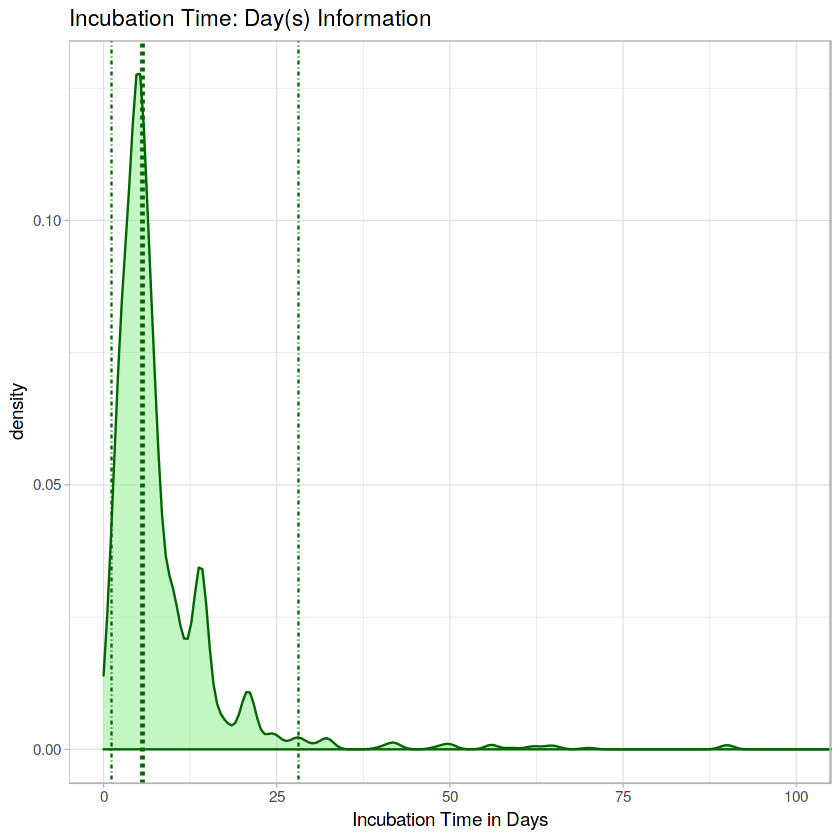

[1] "------------------------------------------------------"
[1] "Days(s) Information Median Incubation Time: 5.6 days"
[1] "Days(s) 95%-CI: 1.1 - 28.08 days"
[1] "Percentage of Data within 3-13 days: 0.70 %"
[1] "------------------------------------------------------"
[1] "Range Information Median Incubation Time: 8 days"
[1] "Days(s) 95%-CI: 2 - 38.75 days"
[1] "Percentage of Data within 3-13 days: 0.69 %"
[1] "------------------------------------------------------"


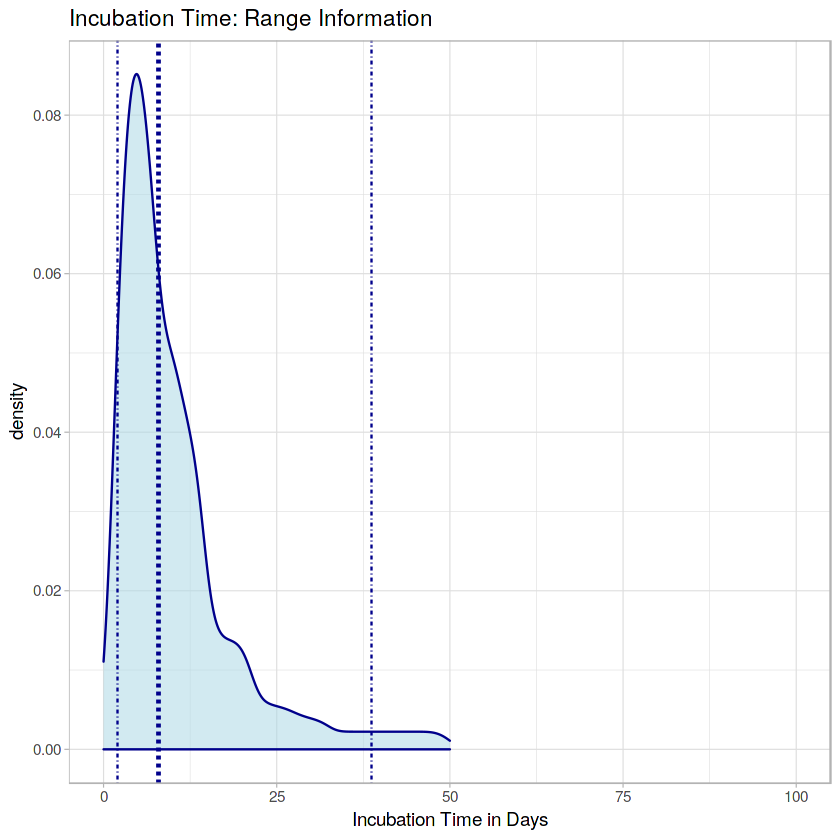

In [8]:
# 3.4 - Plot Incubation Time
incubation_df = tibble(incubation_clean)
names(incubation_df) = "Periods"

incubation_range_df = tibble(unlist(incub_range_clean))
names(incubation_range_df) = "Periods"

plot1 = ggplot(incubation_df, aes(x = Periods)) +
        ## Plot Type
        geom_density(aes(alpha = .8),color="darkgreen", fill="lightgreen") +
        ## Add Median & Quantile lines
        geom_vline(aes(xintercept = median(`Periods`)),
             color="darkgreen", linetype="dashed", size=1) +
        geom_vline(aes(xintercept = quantile(`Periods`, .025)[[1]]),
             color="darkgreen", linetype="dotdash", size=.5) +
        geom_vline(aes(xintercept = quantile(`Periods`, .975)[[1]]),
             color="darkgreen", linetype="dotdash", size=.5) +
        coord_cartesian(xlim = c(0,100)) +
        ## Labs & Theme Customs
        labs(x = "Incubation Time in Days",
             title = "Incubation Time: Day(s) Information") +
        theme_light() +
        theme(legend.position = "none")
plot1

plot2 = ggplot(incubation_range_df, aes(x = Periods)) +
        ## Plot Type
        geom_density(aes(alpha = .8),color="darkblue", fill="lightblue") +
        ## Add Median & Quantile lines
        geom_vline(aes(xintercept = median(`Periods`)),
                   color="darkblue", linetype="dashed", size=1) +
        geom_vline(aes(xintercept = quantile(`Periods`, .025)[[1]]),
                  color="darkblue", linetype="dotdash", size=.5) +
        geom_vline(aes(xintercept = quantile(`Periods`, .975)[[1]]),
                  color="darkblue", linetype="dotdash", size=.5) +
        coord_cartesian(xlim = c(0,100)) +
        ## Labs & Theme Customs
        labs(x = "Incubation Time in Days", 
             title = "Incubation Time: Range Information") +
        theme_light() +
        theme(legend.position = "none")
plot2

day_perc = nrow(incubation_df[which(incubation_df$Periods >= 3 & incubation_df$Periods <=13),]) / nrow(incubation_df)
range_perc = nrow(incubation_df[which(incubation_range_df$Periods >= 3 & incubation_range_df$Periods <=13),]) / nrow(incubation_range_df)

print("------------------------------------------------------")
print(paste("Days(s) Information Median Incubation Time:", median(incubation_df$Periods), "days"))
print(paste("Days(s) 95%-CI:", round(quantile(incubation_df$Periods, .025),digits = 2), "-", round(quantile(incubation_df$Periods, .975), digits = 2),"days"))
print(paste("Percentage of Data within 3-13 days:", format(round(day_perc, 2), nsmall = 2), "%"))
print("------------------------------------------------------")
print(paste("Range Information Median Incubation Time:", median(incubation_range_df$Periods), "days"))
print(paste("Days(s) 95%-CI:", round(quantile(incubation_range_df$Periods, .025),digits = 2), "-", round(quantile(incubation_range_df$Periods, .975), digits = 2),"days"))
print(paste("Percentage of Data within 3-13 days:", format(round(range_perc, 2), nsmall = 2), "%"))
print("------------------------------------------------------")
